# 6.0 Introduction


What is RAG?

RAG 는 Retrieval Augmented Generation (검색 증강 생성) 을 뜻한다.  

일반적으로 모델들은 개인적인 데이터들(개인 DB 나 문서)에는 때론 접근 할 수 없다.   
그래서 우리는 RAG 를 사용한다. 이게 무슨 말이냐면, 우리가 질문했을 때 우리는 2 가지 일을 하게 된다.  

예를 들어보자, 

'foo 가 뭐지?' 란 질문을 하면 우리는 그 질문(question)을 prompt 에 전달한다.  
또한 동시에 우리의 질문과 관련이 있는 문서들도 준비하게 된다.   
그래서 'foo'와 관련된 많은 문서들을 가져 올 것이다.  
그리고 그 문서들은 context 로써 우리의 질문(question)과 함께 묶어서 큰 language model 에 보낸다.  

그럼 이제 모델은 기존에 학습된 수 많은 data와 함께 우리가 model 이 더 나은 답변을 하도록 도와주기 위해 추가로 전송한 data 까지 갖게 된다. 

이게 바로 Retrieval Augmented Generation(RAG)이다.

개인으로부터 제공된 데이터를 사용하거나 탐색함으로써 우리가 Language Model 의 능력을 더 확장시키는 것.  
우리의 질문을 우리 개인의 문서와 함께 prompt 에 합친다.  

그 중 Stuff documents 는 모든 문서를 prompt 에 넣고 model 에 전달하는 방식이다.







# 6.1 Data loaders and Splitters

RAG 의 첫 번째 단계에 대해 알아보자  - Retrieval

Retrieval 는 랭체인의 모듈이다.

데이터를 Retrieval 하는 과정은 다음과 같다.

 어떤 소스에서 데이터를 읽어오고(Load) 분할(Transform)하면서 변환하고, Embed 하고, Store 한다.  
 <Embed - 텍스트에서 컴퓨터가 이해할 수 있는 숫자로 변환  ><br>
 <Store - 저장.  >

분할하는 이유는 embed 때문이다.

데이터를 읽어오는 loader 에 대해 알아보자.

Document loader 는 사용하기 쉽다. 



In [2]:
from langchain.document_loaders import UnstructuredFileLoader

data_path = "./files/chapter_one.txt"
loader = UnstructuredFileLoader(data_path)
loader.load()

[Document(page_content="Part 1, Chapter 1\n\nPart One\n\n1 It was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of Victory Mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor display, had been tacked to the wall. It depicted simply an enormous face, more than a metre wide: the face of a man of about forty-five, with a heavy black moustache and ruggedly handsome features. Winston made for the stairs. It was no use trying the lift. Even at the best of times it was seldom working, and at present the electric current was cut off during daylight hours. It was part of the economy drive in preparation for Hate Week. The flat was seven flights up, and Winston, who was thirty-nine and had a 

다음은 문서를 분할해보자.

문서를 분할해야하는 이유는 loader.load 의 리턴값을 보면 Document 로 이뤄진 리스트인데 위 경우에는 전체 챕터가 하나의 문서에 들어가 있다.

확인해보자.

In [3]:
len(loader.load())

1

문서가 하나의 큰 덩어리 이기 때문에 나누는 작업이 필요하다.

만약 네가 문서를 임베드, 저장하거나 언어 모델에 주고 싶다면 질문에 답해야할 때 필요한 '파일의 부분들'만을 전달할 수 있다.

만약 위 문서 중 특정 문자열인 'The Ministry of Peace' 부분을 찾고자 한다고 치자.

그럼 "Ministry of Peace" 가 어디 있을까 라고 질문을 던지면 

이 문자열을 가지고 있는 문서만 언어 모델에 주면 된다.

그러기 위해서 챕터 하나를 분할해야한다.






그럼 이제 분할하는 방법에 대해 알아보자.

분할하는 방법도 여러가지이다. 

이번에는 chatGPT 3, 4, OpenAI 와 잘 작동하는 걸 사용해본다. 나중에.

아주 일반적인 Text Splitter를 사용해보자.



In [4]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter()

RecursiveCharacterTextSplitter 는 문장 끝이나 문단의 끝부분마다 끊어준다.

문장 중간을 끊어주진 않는다.

splitter 를 불러오면 두 가지 옵션이 있다.

첫 번째 옵션..

In [5]:
loader = UnstructuredFileLoader(data_path)
docs = loader.load()
splitter.split_documents(docs)

[Document(page_content="Part 1, Chapter 1\n\nPart One\n\n1 It was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of Victory Mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor display, had been tacked to the wall. It depicted simply an enormous face, more than a metre wide: the face of a man of about forty-five, with a heavy black moustache and ruggedly handsome features. Winston made for the stairs. It was no use trying the lift. Even at the best of times it was seldom working, and at present the electric current was cut off during daylight hours. It was part of the economy drive in preparation for Hate Week. The flat was seven flights up, and Winston, who was thirty-nine and had a 

두 번째 옵션..

loader.load_and_split()

In [6]:
loader = UnstructuredFileLoader(data_path)
loader.load_and_split(text_splitter=splitter)

[Document(page_content="Part 1, Chapter 1\n\nPart One\n\n1 It was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of Victory Mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor display, had been tacked to the wall. It depicted simply an enormous face, more than a metre wide: the face of a man of about forty-five, with a heavy black moustache and ruggedly handsome features. Winston made for the stairs. It was no use trying the lift. Even at the best of times it was seldom working, and at present the electric current was cut off during daylight hours. It was part of the economy drive in preparation for Hate Week. The flat was seven flights up, and Winston, who was thirty-nine and had a 

얼마나 큰 덩어리로 나눌지도 결정할 수 있다.

In [7]:
splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50,
)
loader = UnstructuredFileLoader(data_path)
loader.load_and_split(text_splitter=splitter)

[Document(page_content='Part 1, Chapter 1\n\nPart One', metadata={'source': './files/chapter_one.txt'}),
 Document(page_content='1 It was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass', metadata={'source': './files/chapter_one.txt'}),
 Document(page_content='the vile wind, slipped quickly through the glass doors of Victory Mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him.', metadata={'source': './files/chapter_one.txt'}),
 Document(page_content='The hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor display, had been tacked to the wall. It depicted simply an enormous face, more than a', metadata={'source': './files/chapter_one.txt'}),
 Document(page_content='It depicted simply an enormous face, more than a metre wide: the face of a man of abou

다른 splitter 도 있다.

CharacterTextSplitter

얘도 작동 방식이 비슷하다.

chunk size 가 있고, chunk Overlap 이 있다.

그리고 separator 가 있어서 특정 문자열을 찾은 다음 거기부터 끊는다.

In [8]:
from langchain.text_splitter import CharacterTextSplitter

splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=600,
    chunk_overlap=100,
)

loader = UnstructuredFileLoader(data_path)
loader.load_and_split(text_splitter=splitter)

Created a chunk of size 963, which is longer than the specified 600
Created a chunk of size 774, which is longer than the specified 600
Created a chunk of size 954, which is longer than the specified 600
Created a chunk of size 922, which is longer than the specified 600
Created a chunk of size 1168, which is longer than the specified 600
Created a chunk of size 821, which is longer than the specified 600
Created a chunk of size 700, which is longer than the specified 600
Created a chunk of size 745, which is longer than the specified 600
Created a chunk of size 735, which is longer than the specified 600
Created a chunk of size 1110, which is longer than the specified 600
Created a chunk of size 991, which is longer than the specified 600
Created a chunk of size 990, which is longer than the specified 600
Created a chunk of size 1182, which is longer than the specified 600
Created a chunk of size 1491, which is longer than the specified 600
Created a chunk of size 1401, which is longe

[Document(page_content='Part 1, Chapter 1\nPart One\n1 It was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of Victory Mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him.', metadata={'source': './files/chapter_one.txt'}),
 Document(page_content='The hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor display, had been tacked to the wall. It depicted simply an enormous face, more than a metre wide: the face of a man of about forty-five, with a heavy black moustache and ruggedly handsome features. Winston made for the stairs. It was no use trying the lift. Even at the best of times it was seldom working, and at present the electric current was cut off during daylight hours. It was part of the economy drive in preparation for Hate Week. The fl

In [9]:
len(loader.load_and_split(text_splitter=splitter))

Created a chunk of size 963, which is longer than the specified 600
Created a chunk of size 774, which is longer than the specified 600
Created a chunk of size 954, which is longer than the specified 600
Created a chunk of size 922, which is longer than the specified 600
Created a chunk of size 1168, which is longer than the specified 600
Created a chunk of size 821, which is longer than the specified 600
Created a chunk of size 700, which is longer than the specified 600
Created a chunk of size 745, which is longer than the specified 600
Created a chunk of size 735, which is longer than the specified 600
Created a chunk of size 1110, which is longer than the specified 600
Created a chunk of size 991, which is longer than the specified 600
Created a chunk of size 990, which is longer than the specified 600
Created a chunk of size 1182, which is longer than the specified 600
Created a chunk of size 1491, which is longer than the specified 600
Created a chunk of size 1401, which is longe

45

# 6.2 Tiktoken

기본적으로, 이 모든 splitter 들은 텍스트의 length를 계산해서 한 덩어리의(chunk) 크기를 알아낸다.

그 작업에 파이썬 표준 라입르ㅓ리가 지우너하는 표준 len 함수를 사용한다.

여기서 너만의 len 함수를 명시적으로 설정할 수 있다.

예를 들어, 'ABCD' 를 입력하면, len 이, 문자의 개수인 '4'를 반환한다.

하지만 LLM 들은 Token 을 같은 방법으로 세어주지 않는다.

openAI 의 tokenizer 에 들어가면 model 의 관점에서 우리가 몇 개의 token을 사용하는지 볼 수 있다.

우리가 할 건 이 tokenizer(토큰화) 함수를 splitter 에 사용해 보는 것이다.

그러기 위해서 from_tiktoken_encoder 를 사용한다.

또 이것을 사용하는 이유는 모델이 텍스트를 세는 방법과 우리가 텍스트를 세는 방법을 일치하기 위해서이다.



In [10]:
splitter = CharacterTextSplitter.from_tiktoken_encoder(
    separator="\n",
    chunk_size=600,
    chunk_overlap=100,
)

# 6.3 Vectors

이번에는 Embedding 에 대해 알아보자.

임베딩의 의미는 사람이 읽는 텍스트를 컴퓨터가 이해할 수 있는 숫자들로 변환하는 작업이다.

먼저 벡터에 대해 알아보자.

벡터, 정확히 vectorization(벡터화) 작업을 하게 될 건데, 우리가 만든 문서마다 각각의 벡터를 만들어준다.

즉, 나중에는 split 처리한 문서마다 embed 작업을 해줄 것이다.

우리가 이번에 사용해볼 embed 모델은 openai 의 모델이고 이건 최소 1000차원을 갖는 벡터를 제공한다.


3차원을 이용해서 벡터에 대해 알아보자.

```
            Masculinity(남성성) | Femininity(여성성) | Royalty(왕족성)
king    |       0.9             |       0.1          |      1.0
queen   |       0.1             |       0.9         |       1.0
man     |       0.9             |       0.1         |       0.0
```

위에서 우리는 점수를 매겼다.

각 단어가 해당 특성을 얼마나 반영하는지 평가한 것이다.

이게 우리의 3D 벡터의 차원들이다.

단어를 이런 차원들로 표현할 때의 멋진점은 

다른 단어를 얻기 위해 가진 단어를 가지고 연산을 할 수 있다는 점이다.

만약 king - man 에 대한 계산을 해본다면,

```
            Masculinity(남성성) | Femininity(여성성) | Royalty(왕족성)
king    |       0.9             |       0.1          |      1.0
man     |       0.9             |       0.1         |       0.0
             (0.9 - 0.9)             (0.1 - 0.1)    |    (1.0 - 0.0)
???     |       0.0             |       0.0         |       1.0
```
결과 단어는 0% 의 Masculinity 와 Feminity , 그리고 100% 의 royalty 를 갖는다.

아마 단어는 Royal 일 것이다.

성별은 몰라도 왕족이 확실함(100% Royalty)은 알 수 있다.

다음은 woman 이란 단어로 연산을 해보자.

```
            Masculinity(남성성) | Femininity(여성성) | Royalty(왕족성)
king    |       0.9             |       0.1          |      1.0
man     |       0.9             |       0.1         |       0.0
royal   |       0.0             |       0.0         |       1.0
woman   |       0.1             |       0.9         |       0.0
```

이번에는 royal + woman 연산을 해보자.
```
royal   |       0.0             |       0.0         |       1.0
woman   |       0.1             |       0.9         |       0.0
            (0.0 + 0.1)             (0.0 + 0.9)          (1.0 + 0.0)
???     |       0.1             |       0.9         |       1.0
``` 
이 값은 어떤걸 나타낼까. 

바로 queen 을 나타낸다.

이렇게 embedding 을 하면 단어끼리 연산을 할 수 있다.

문서들을 숫자로 바꿔 벡터에 대한 검색(search)작업을 할 수 있게 된다.




이는 비슷한 벡터를 찾을 수 있게 된다는 것과 같다.

이게 바로 많은 추천 알고리즘들이 작동하는 방식이다.

# 6.4 Vector Store

이전에 split 했던 문서에 embed 작업을 해보자.




In [11]:
from langchain.embeddings import OpenAIEmbeddings

embedder = OpenAIEmbeddings()

# embed 는 문서를 embed 하는 것도 가능하지만, query 도 embed 가능하다.
# embedder.embed_documents()
embedder.embed_query("Hi")

[-0.03629858192333016,
 -0.007224538187570183,
 -0.033718855541097256,
 -0.028663632678071895,
 -0.026865641732513677,
 0.03460482274185761,
 -0.012318847263635711,
 -0.007752209747023989,
 0.0019380524367559973,
 -0.0027018730680822924,
 0.024781013901381176,
 -0.0024771241998875156,
 -0.005732726535614379,
 -0.0029054499465086627,
 0.0066773232887656405,
 -0.0030324821179497563,
 0.03384914384922042,
 -0.0015032120884641694,
 0.021093827586875214,
 -0.008996472123429593,
 -0.02171921630874401,
 0.010384052476961034,
 0.0062441115908914826,
 0.007081220210444346,
 -0.01231233266196503,
 0.0008998100308185957,
 0.005876044512740216,
 -0.009888952994538019,
 -0.0030731974470689,
 -0.024572550373209837,
 0.010742348118267585,
 -0.013810659381252822,
 -0.024429232861745306,
 -0.014110324538845857,
 0.0024347802203507018,
 -0.018878911447619544,
 0.000561872345109932,
 -0.01127001874639878,
 0.018110203351640992,
 -0.009967126351940966,
 0.013028923944578134,
 -0.011328649230112295,
 -0.00

embed 작업을 수행하면 이 단어에 해당하는 벡터를 얻게 된다.

몇개의 차원일까?



In [12]:
len(embedder.embed_query("Hi"))

1536

총 1536 개의 차원을 가지고 있다.

이번에는 문서들을 임베딩 해보자.

이것들은 string 의 배열로 되어 있어야 한다.

In [13]:
vector = embedder.embed_documents(
    [
        "hi",
        "how",
        "are",
        "you",
    ]
)

print(len(vector), len(vector[0]))

4 1536


위 내용을 보면 4개의 벡터가 있고, 각 벡터는 1536 개의 차원을 갖고 있다는 것을 알 수 있다.

이제 실제 우리의 문서를 embed 해보자.

어떻게 하냐면 방금 embed_documents 를 실행하는 것처럼 직접적으로 하지는 않을 것이다.

왜냐하면 코드를 실행할 때마다 문서 embed 를 반복해서 수행하고 싶지 않기 때문이다.

대신, 우리는 그 embed 들을 저장해줄것이다.

랭체인은 embedding 한 것들을 캐싱하는 기능을 제공하고 있다.

문서가 바뀌지 않는 한 embeddings 도 바뀌지 않는다.


vector store 는 일종의 데이터베이스라고 생각할 수 있다.

벡터 공간에서 검색을 할 수 있게 해준다. 여기서는 Chroma 를 사용해보자.

Chroma 에 분할된 문서와 openAI embeddings model 을 전달한다.

In [14]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma

splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=600,
    chunk_overlap=100,
)

loader = UnstructuredFileLoader(data_path)

docs = loader.load_and_split(text_splitter=splitter)

embeddings = OpenAIEmbeddings()

vectorstore = Chroma.from_documents(docs, embeddings)

Created a chunk of size 963, which is longer than the specified 600
Created a chunk of size 774, which is longer than the specified 600
Created a chunk of size 954, which is longer than the specified 600
Created a chunk of size 922, which is longer than the specified 600
Created a chunk of size 1168, which is longer than the specified 600
Created a chunk of size 821, which is longer than the specified 600
Created a chunk of size 700, which is longer than the specified 600
Created a chunk of size 745, which is longer than the specified 600
Created a chunk of size 735, which is longer than the specified 600
Created a chunk of size 1110, which is longer than the specified 600
Created a chunk of size 991, which is longer than the specified 600
Created a chunk of size 990, which is longer than the specified 600
Created a chunk of size 1182, which is longer than the specified 600
Created a chunk of size 1491, which is longer than the specified 600
Created a chunk of size 1401, which is longe

작업이 완료되기까지 3초가 걸렸다.

vectorstore에서 유사도 검색을 수행해보자.(vectorstore.similarity_search)

In [15]:
results = vectorstore.similarity_search("where does winston live?")
len(results)

4

In [16]:
results

[Document(page_content='Winston kept his back turned to the telescreen. It was safer, though, as he well knew, even a back can be revealing. A kilometre away the Ministry of Truth, his place of work, towered vast and white above the grimy landscape. This, he thought with a sort of vague distaste -- this was London, chief city of Airstrip One, itself the third most populous of the provinces of Oceania. He tried to squeeze out some childhood memory that should tell him whether London had always been quite like this. Were there always these vistas of rotting nineteenth-century houses, their sides shored up with baulks of timber, their windows patched with cardboard and their roofs with corrugated iron, their crazy garden walls sagging in all directions? And the bombed sites where the plaster dust swirled in the air and the willow-herb straggled over the heaps of rubble; and the places where the bombs had cleared a larger patch and there had sprung up sordid colonies of wooden dwellings li

이제 embeddings 을 캐싱해보자.


In [17]:
from langchain.embeddings import CacheBackedEmbeddings
from langchain.storage import LocalFileStore

cache_dir = LocalFileStore("./.cache/")

splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=600,
    chunk_overlap=100,
)


loader = UnstructuredFileLoader("./files/chapter_one.txt")

docs = loader.load_and_split(text_splitter=splitter)

embeddings = OpenAIEmbeddings()

cached_embeddings = CacheBackedEmbeddings.from_bytes_store(embeddings, cache_dir)

vectorstore = Chroma.from_documents(docs, cached_embeddings)

Created a chunk of size 963, which is longer than the specified 600
Created a chunk of size 774, which is longer than the specified 600
Created a chunk of size 954, which is longer than the specified 600
Created a chunk of size 922, which is longer than the specified 600
Created a chunk of size 1168, which is longer than the specified 600
Created a chunk of size 821, which is longer than the specified 600
Created a chunk of size 700, which is longer than the specified 600
Created a chunk of size 745, which is longer than the specified 600
Created a chunk of size 735, which is longer than the specified 600
Created a chunk of size 1110, which is longer than the specified 600
Created a chunk of size 991, which is longer than the specified 600
Created a chunk of size 990, which is longer than the specified 600
Created a chunk of size 1182, which is longer than the specified 600
Created a chunk of size 1491, which is longer than the specified 600
Created a chunk of size 1401, which is longe

In [18]:
vectorstore

# 6.5 Langsmith

langsmith 와 이것의 설정 방법

이 도구는 우리의 체인이 무엇을 하고있는지 시각적으로 보여준다.



# 6.6 RetrievalQA

## 다양한 타입의 document chain 생성 방식
### 1. Stuff
Stuff 는 우리가 찾은 document 들로 prompt 를 채우기(stuff) 하는데 사용한다는 뜻이다.
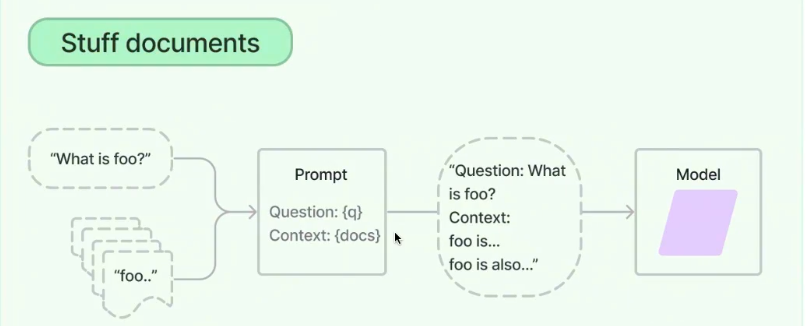

먼저 질문을 한다: What is foo?

그 질문을 사용해서 document 를 search 할 거다.

그 다음 찾은 document들을 Prompt 에 입력해서 model 에게 전달한다.

그리고 model 은 입력된 질문과 documents 를 토대로 우리에게 답변을 해줄 것이다.

In [5]:
from langchain.document_loaders import UnstructuredFileLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings, CacheBackedEmbeddings
from langchain.vectorstores import Chroma
from langchain.storage import LocalFileStore
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI


llm = ChatOpenAI()

cached_dir = LocalFileStore(".cache/")

splitter = CharacterTextSplitter.from_tiktoken_encoder(
    separator="\n",
    chunk_size=600,
    chunk_overlap=100,
)

loader = UnstructuredFileLoader("./files/chapter_one.txt")

docs = loader.load_and_split(text_splitter=splitter)

embeddings = OpenAIEmbeddings()

cached_embeddings = CacheBackedEmbeddings.from_bytes_store(embeddings, cached_dir)

vectorstore = Chroma.from_documents(docs, cached_embeddings)

chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=vectorstore.as_retriever(),
)

chain.run("Where does Winston live?")

'Winston lives in Victory Mansions, which is a dilapidated apartment building in a dystopian society.'

Retriever 란?

document 를 많은 장소로부터 Retrieve(선별하여 가져오기) 할 수 있다. 

vectorstore 말고 다른데서도!

document를 검색해서 찾아오는(retrieve) 기능

In [6]:
chain.run("Describe Victory Mansions")

'Victory Mansions is a building where Winston Smith lives in the novel "1984" by George Orwell. It is described as having a hallway that smells of boiled cabbage and old rag mats. The building has a faulty elevator and the electricity is cut off during daylight hours as part of an economy drive. Inside the flat, there is a telescreen that cannot be completely shut off, and a poster of a large face with the caption "BIG BROTHER IS WATCHING YOU" on the wall.'

## 2. Refine
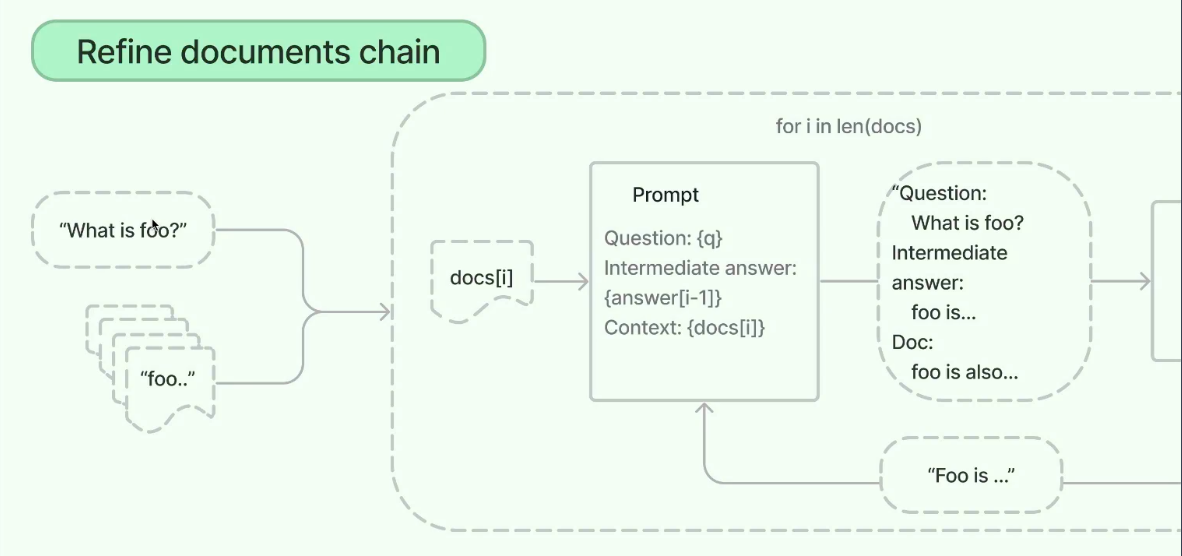


먼저 질문을 통해 관련된 document 를 얻는다.

그리고 각각의 document 를 읽으면서, 질문에 대한 답변 생성을 시도한다.

작업을 반복하면서 만나는 모든 document 를 통해 답변을 개선시킨다.

그 작업을 바로 Refine(정제, 가다듬기) 라고 한다.

처음에는 질이 좋지 않은 답변으로 시작, 

첫 번째 document 를 읽고 그것을 기반으로 답변을 업데이트,

그 다음 두 번째 document 를 읽고 그 정보로 또 답변을 업데이트한다.
 
이러한 refining(정제) 과정을 거치기 때문에 비용을 많이 쓴다.

document 의 수만큼 개별적으로 하나의 답변을 생성해야되므로 만약 10개라면 10번 질문을 해야 한다는 것.

정제된 최종 답변을 얻기 위해서!




## 3. Map Reduce

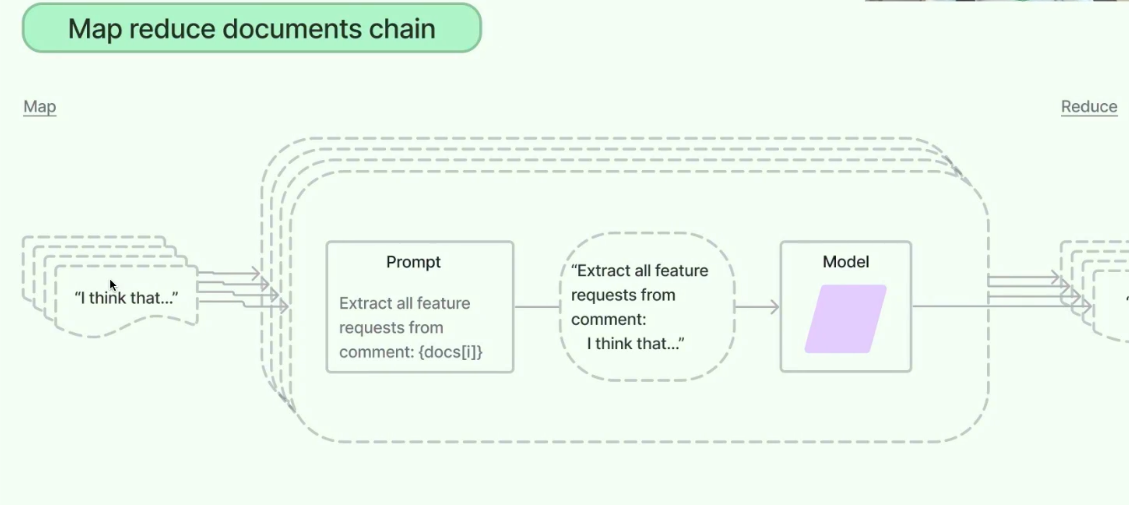

이건 document 들을 입력받아서, 개별적으로 요약작업을 수행한다.

query 를 입력하면, documents 들을 얻어서 각각에 대한 요약 작업을 하게 된다.


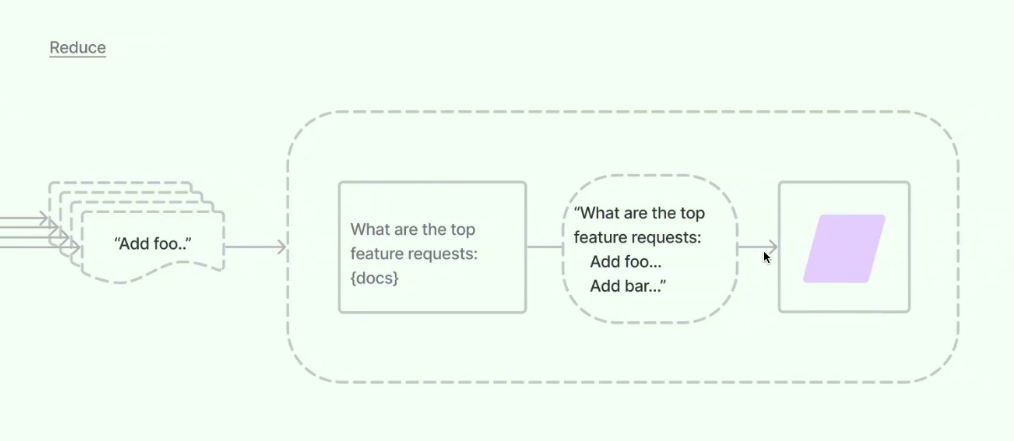

그리고 각각의 요약본을 LLM 에게 전달한다.

굉장히 크고 많은 연산(operation)들이 수행된다.

---

RetrievalQA 를 사용할 떄의 장점중 하나는, chain_type을 손쉽게 바꿀 수 있다는 것이다.

또 알아야할 것은, Chroma 가 우리 컴퓨터에서 실행되는 vectorstore 라는 점이다.

원한다면 Chroma 대신 FAISS 를 사용할 수 있다. 

MapReduce 는 각 document를 순회하면서 개별 답변을 찾아낸 후, 

탐색이 끝나면, 일종의 중간(intermediate)답변들을 기반으로 최종 응답을 반환한다.



In [10]:
from langchain.document_loaders import UnstructuredFileLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings, CacheBackedEmbeddings
from langchain.vectorstores import FAISS
from langchain.storage import LocalFileStore
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI


llm = ChatOpenAI()

cached_dir = LocalFileStore(".cache/")

splitter = CharacterTextSplitter.from_tiktoken_encoder(
    separator="\n",
    chunk_size=600,
    chunk_overlap=100,
)

loader = UnstructuredFileLoader("./files/chapter_one.txt")

docs = loader.load_and_split(text_splitter=splitter)

embeddings = OpenAIEmbeddings()

cached_embeddings = CacheBackedEmbeddings.from_bytes_store(embeddings, cached_dir)

vectorstore = FAISS.from_documents(docs, cached_embeddings)

chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="refine",
    retriever=vectorstore.as_retriever(),
)

chain.run("Where does Winston live?")

"In addition to living in Victory Mansions, Winston Smith also works at the Ministry of Truth, which is responsible for rewriting historical records to align with the Party's current narrative. The oppressive environment in which Winston lives and works is characterized by constant surveillance, fear, and manipulation. The Ministry of Love, the most frightening of all the ministries, is a place of extreme control and torture, where individuals are interrogated and punished for even the slightest hint of dissent. Winston's daily routines, such as sacrificing his lunch to avoid the canteen and drinking Victory Gin to numb his senses, reflect the bleak and oppressive nature of his existence in the dystopian society created by the Party."

In [8]:
chain.run("Describe Victory Mansions")

"Victory Mansions is a decrepit and overcrowded apartment block situated in a dystopian and oppressive urban landscape. The building's run-down condition, combined with the constant surveillance and propaganda of the ruling Party, creates a stifling and dismal living environment for its residents. The telescreen, a tool of the Party's surveillance, is strategically placed in the living room to monitor and control the residents. In this oppressive setting, Winston finds solace in an old book that he acquires through illicit means, symbolizing a small act of rebellion against the Party's control over information and thought. The contrast between the deteriorating physical surroundings of Victory Mansions and Winston's act of seeking forbidden knowledge serves to underscore the stark disparity in power and control in Orwell's totalitarian society."

# 6.8 Stuff LCEL Chain

In [11]:
from langchain.document_loaders import UnstructuredFileLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings, CacheBackedEmbeddings
from langchain.vectorstores import FAISS
from langchain.storage import LocalFileStore
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnablePassthrough

llm = ChatOpenAI(temperature=0.1)

cached_dir = LocalFileStore(".cache/")

splitter = CharacterTextSplitter.from_tiktoken_encoder(
    separator="\n",
    chunk_size=600,
    chunk_overlap=100,
)

loader = UnstructuredFileLoader("./files/chapter_one.txt")

docs = loader.load_and_split(text_splitter=splitter)

embeddings = OpenAIEmbeddings()

cached_embeddings = CacheBackedEmbeddings.from_bytes_store(embeddings, cached_dir)

vectorstore = FAISS.from_documents(docs, cached_embeddings)

retriever = vectorstore.as_retriever()

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "you are a helpful assistant. Asnwer questions using only the following context. If you don't know the answer just say you don't know, don't make it up:\n\n{context}",
        ),
        ("human", "{question}"),
    ]
)

# RunnablePassthrough: 입력값 전달
chain = {"context": retriever, "question": RunnablePassthrough()} | prompt | llm

chain.invoke("Describe Victory Mansions")

AIMessage(content='Victory Mansions is a building where Winston Smith resides. It is a run-down apartment complex with glass doors, a malfunctioning lift, and gritty dust swirling around. The hallway smells of boiled cabbage and old rag mats. A large colored poster of a man\'s face with a caption "BIG BROTHER IS WATCHING YOU" is displayed on the wall. The flat is seven flights up, and Winston, who is thirty-nine years old with a varicose ulcer, lives there. The building is part of the city of London, in Airstrip One, which is one of the provinces of Oceania.')

# 6.9 Map Reduce LCEL Chain

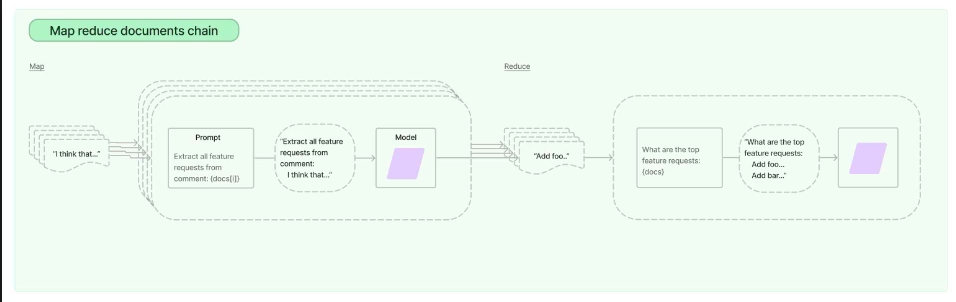
LCEL 을 이용해서 MapReduce chain 을 직접 구현해보자.

일단은 단순화된 버전을 만든다.
- token을 세어주거나 prompt 가 context window 에 적합한지 확인하는 그런거

mapreduce는 어떻게 작동할까??

일단 document의 list를 얻어야 한다.    
: list of docs

그 다음 list 내부의 모든 document들을 위한 prompt 를 만들어준다.   
: for doc in list of docs | prompt | llm

그 pomrpt 는 LLM 에게 전달할건데, 기본적인 내용은 다음과 같다.   
'이 document 를 읽고, 사용자의 질문에 답변하기에 적절한 정보가 있는지 확인해주세요.'

이를 전달받은 LLM의 응답(response)를 출력한다. 

그리고 LLM 으로부터 받은 response 들을 취합해 하나의 document를 만들어낸다.  
: for response in list of llms response | put them all together

그렇게 만들어진 단 하나의 최종 document 가, LLM 을 위한 prompt 로 전달된다.   
: final doc | prompt | llm

그러면 마침내 처음의 질문에 대한 답변이 생성될 것이다.

----



```python
retriever = vectorstore.as_retriever()

list of docs

for doc in list of docs | prompt | llm

for response in list of llms response | put them all together

final doc | prompt | llm

chain.invoke("Describe Victory Mansions")
```


1. chain.invoke("Describe Victory Mansions")  
처음부터 정리해보면, 우리는 '빅토리 멘션을 묘사해주세요.' 라는 질문을 할건데 그 질문은 우선 retriever 에게 전달된다.

2. list of docs
그럼 retriever 는 빅토리 멘션을 묘사하는것과 관련이 있는 documet list 를 반환한다.

3. for doc in list of docs | prompt | llm  
그 list 의 모든 document 에 대한 prompt 를 만들고, 그걸 llm 에 전달한다.  
prompt 는 이런 내용을 담고있다. "이 문서를 읽고, 질문에 답하는데에 관련이 있는 중요한 정보를 추출하세요."  
그 작업이 list 의 모든 document 에 수행될 것이다.   
만약 5개의 document 가 있다면, LLM 에게 5 번 질문해서 5 개의 응답을 받을것이다.  

4. for response in list of llms response | put them all together   
그리고 그 응답들을 전부 묶어서 하나의 긴 document 를 만든다.  

5. final doc | prompt | llm   
그 최종 document 하나가 prompt 에 입력되어서 LLM에게 전달된다.    
prompt 의 내용은 "이것은 질문과 관련이 있는 정보들입니다. 이를 사용하여 대답해주세요."

---


그렇다면 현재 이 방식(MapReduce) 과 Stuff 방식 중 어떤 상황에서 어느 것을 사용하는 것이 더 효율적일까?

정답은 네가 원하는 prompt 의 크기와 검색할 document 수에 따라 달라진다.

LCEL  를 사용해서 위 로직을 구현해보자.

In [2]:
from langchain.document_loaders import UnstructuredFileLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings, CacheBackedEmbeddings
from langchain.vectorstores import FAISS
from langchain.storage import LocalFileStore
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnablePassthrough, RunnableLambda

llm = ChatOpenAI(temperature=0.1)

cached_dir = LocalFileStore(".cache/")

splitter = CharacterTextSplitter.from_tiktoken_encoder(
    separator="\n",
    chunk_size=600,
    chunk_overlap=100,
)

loader = UnstructuredFileLoader("./files/chapter_one.txt")

docs = loader.load_and_split(text_splitter=splitter)

embeddings = OpenAIEmbeddings()

cached_embeddings = CacheBackedEmbeddings.from_bytes_store(embeddings, cached_dir)

vectorstore = FAISS.from_documents(docs, cached_embeddings)

retriever = vectorstore.as_retriever()

# list of docs

# for doc in list of docs | prompt | llm
map_doc_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
            Use the following portion of a long document to see if any of the text is relevant to answer the question. Return any relevant text verbatim.
            ----------
            {context}
            """,
        ),
        ("human", "{question}"),
    ]
)

map_doc_chain = map_doc_prompt | llm
# for response in list of llms response | put them all together


# final doc | prompt | llm
def map_docs(inputs):
    documents = inputs["documents"]
    question = inputs["question"]
    return "\n\n".join(
        map_doc_chain.invoke(
            {
                "context": doc.page_content,
                "question": question,
            }
        ).content
        for doc in documents
    )

    # results = []
    # for document in documents:
    #     result = map_doc_chain.invoke(
    #         {
    #             "context": document.page_content,
    #             "question": question,
    #         }
    #     ).contents
    #     results.append(result)
    # results = "\n\n".join(results)
    # return results


map_chain = {
    "documents": retriever,
    "question": RunnablePassthrough(),
} | RunnableLambda(map_docs)

final_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
            Given the following extracted parts of a long document and a question, create a final answer. 
            If you don't know the answer, just say that you don't know. Don't try to make up an answer."
            ------
            {context}
            """,
        ),
        ("human", "{question}"),
    ]
)

chain = {"context": map_chain, "question": RunnablePassthrough()} | final_prompt | llm

chain.invoke("Describe Victory Mansions")

AIMessage(content='Victory Mansions is a building complex where Winston resides in the novel "1984" by George Orwell. It is described as a building with glass doors that Winston enters on a bright cold day in April. The hallway has a smell of boiled cabbage and old rag mats, with a large colored poster depicting an enormous face of a man with a heavy black mustache. The building has seven flights of stairs, with a poster of the enormous face on each landing opposite the lift-shaft. Equipped with a telescreen constantly broadcasting information, Winston\'s flat inside Victory Mansions has a window and a switch to control the telescreen. From the roof of Victory Mansions, one can see the Ministry of Truth and three other similar buildings, surrounded by a grimy landscape with rotting nineteenth-century houses nearby. The living-room in Victory Mansions has an unusual position for the telescreen, placed on the longer wall opposite the window, with a shallow alcove probably intended for bo

In [3]:
chain.invoke("Where does Winston go to work?")

AIMessage(content='Winston goes to work at the Ministry of Truth, also known as Minitrue in Newspeak.')